# Analysis and Detection of PCOS

This project is designed to provide students with hands-on experience simulating a real-world scenario in healthcare. The dataset includes a comprehensive set of physical and clinical parameters related to Polycystic Ovary Syndrome (PCOS) and infertility issues among women.


### Problem Statement:
Your goal is to develop a predictive model for the early detection of PCOS and infertility-related issues. PCOS is a complex hormonal disorder, and early diagnosis is crucial for effective management. Possible problem statements include predicting the likelihood of PCOS or identifying factors contributing to infertility based on the provided parameters.

### Tasks:
* Explore the PCOS dataset to understand its structure and features.
* Identify missing values, outliers, and patterns in the data.
* Select relevant physical and clinical parameters for PCOS and infertility detection.
* Perform any necessary preprocessing steps, such as handling missing values or encoding categorical variables.
* Choose appropriate machine learning models for binary classification (e.g., Logistic Regression)
* Train the model on the training set and evaluate its performance on the testing set.
* Explore different classification metrics (accuracy, precision, recall, F1 score).
* Formulate hypotheses related to PCOS and infertility based on the dataset.
* Use appropriate statistical tests to test these hypotheses.
* Create visualizations to support your findings and enhance the interpretability of the model.
* Summarize your results, including key insights into physical and clinical parameters associated with PCOS and infertility.


### Suggested Timeline:
* Week 1: Project introduction and Dataset Exploration
Team formation (4-5 students).
Introduction to the project, objectives, and PCOS dataset.
Dataset acquisition and initial exploration.
* Week 2: Feature Exploration
Data manipulation using Numpy and Pandas.
Exploring the dataset.
* Week 3-4: EDA & Visualization
Data manipulation using Numpy and Pandas.
Exploring EDA and visualization techniques.
Select relevant features and formulate the problem statement.
* Week 5: Mid-Program Presentation
Present progress achieved till the EDA stage.
Receiving feedback and suggestions for further analysis.
* Week 6: Initial Modeling
Begin experimenting with different ML models
Train Initial model and evaluate performance.
* Week 7: Hypothesis Testing
Formulate hypothesis related to factors influencing infertility or medical complications.
Conduct hypothesis testing and statistical analysis.
* Week 8: Final Model Training and Interpretation
Train final predictive models incorporating insights from previous analysis.
Interpret results, summarize key insights
* Week 9: Final Presentation
Present methodology, results and insights


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the default seaborn style for our plots
sns.set()
# set up notebook to show all outputs in a cell, not only last one

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [14]:
# Load the datasets
pcos_without_infertility_path = 'PCOS_data_without_infertility.xlsx'
pcos_infertility_path = 'PCOS_infertility.csv'

pcos_data = pd.read_excel(pcos_without_infertility_path)
pcos_infertility = pd.read_csv(pcos_infertility_path)

In [15]:
# Load the datasets
pcos_without_infertility_path = 'PCOS_data_without_infertility.xlsx'
pcos_infertility_path = 'PCOS_infertility.csv'

pcos_data = pd.read_excel(pcos_without_infertility_path)
pcos_infertility = pd.read_csv(pcos_infertility_path)

### About the data:

This dataset contains all physical and clinical parameters to determine PCOS and infertility related issues. There are a total of 44 parameters.

* This data is collected from 10 different hospitals across Kerala, India.

* The unit used is feet to cm

* Blood pressure entered as systolic and diastolic separately(将血压分为收缩压和舒张压分开输入意味着血压测量结果被分成两个值进行记录)

* RBS means Random glucose test（随机血糖测试）

* Beta-HCG cases are mentioned as Case I and II(人绒毛膜促性腺激素的亚单位)

* Blood Group indications: A+ = 11, A- = 12, B+ = 13, B- = 14, O+ =15, O- = 16, AB+ =17, AB- = 18
* Endometrium (mm): Size of Endometrium in mm （子宫内膜的大小，以毫米为单位）
* Follicle No. (L): Follicles number in the left side （左侧卵泡的数量）
* Follicle No. (R): Follicles number in the right side（右侧卵泡的数量）

### Initial exploration of the PCOS dataset without infertility data

In [16]:
pcos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     241 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [17]:
pcos_data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,NaN,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,NaN,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,NaN,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,NaN,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,NaN,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [18]:
pcos_data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,241.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,23.948963,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,3.658564,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,15.100000,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.900000,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.000000,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.000000,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


### Initial exploration of the PCOS dataset with infertility data

In [19]:
pcos_infertility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3     I   beta-HCG(mIU/mL)  541 non-null    float64
 4   II    beta-HCG(mIU/mL)  541 non-null    float64
 5   AMH(ng/mL)              541 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 25.5+ KB


In [20]:
pcos_infertility.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [21]:
pcos_infertility.describe()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
count,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,10271.000000,0.327172,664.549235,238.229518
std,156.317519,156.317519,0.469615,3348.920576,1603.826221
min,1.000000,10001.000000,0.000000,1.300000,0.110417
25%,136.000000,10136.000000,0.000000,1.990000,1.990000
50%,271.000000,10271.000000,0.000000,20.000000,1.990000
75%,406.000000,10406.000000,1.000000,297.210000,97.630000
max,541.000000,10541.000000,1.000000,32460.970000,25000.000000


# Preprocessing
Steps:
* Merging the two files that are sorted into two based on patients with infertility and without infertility

* Dropping the repeated features

* Encoding categorical variables (dtype objects)

* Dealing with missing values

In [22]:
#Merging the two files as per patient file no.
#The files were sorted into two based on patients with infertility and without infertility
data = pd.merge(pcos_data,pcos_infertility, on='Patient File No.', suffixes=('','_y'),how='left')

#Dropping the repeated features after merging
data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

#Taking a look at the dataset
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,NaN,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,NaN,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,NaN,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,NaN,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,NaN,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     241 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

Categorical Variables (dtype object)

In [24]:
#Having a look at the data with dtype objects
data["II    beta-HCG(mIU/mL)"].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II    beta-HCG(mIU/mL), dtype: object

In [25]:
data["AMH(ng/mL)"].head()

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [26]:
#Dealing with categorical values.
#In this database the type objects are numeric values saved as strings.
#Corverting them into a numeric value.

data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

Missing Values

In [27]:
data.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                       300
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      1
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                    532
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio           532
TSH (mIU/L)                 0
AMH(ng/mL)                  1
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [36]:
#Filling NA values with the median of that feature for missing values <5
data['Marraige Status (Yrs)'] = data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median())
data['II    beta-HCG(mIU/mL)'] = data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median())
data['AMH(ng/mL)'] = data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median())
data['Fast food (Y/N)'] = data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median())





In [29]:
# Droppping NA values is more than 180 (1/3 of the total is missing)
data = data.drop(['BMI', 'FSH/LH', 'Waist:Hip Ratio'], axis = 1)
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,15,78,22,10.48,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,15,74,20,11.70,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,11,72,18,11.80,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,13,72,20,12.00,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,11,72,18,10.00,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [30]:
#Clearing up the extra space in the column names
data.columns = [col.strip() for col in data.columns]

## Exploratory Data Analysis

In [31]:
data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,13.802218,73.247689,19.243993,11.160037,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,1.840812,4.430285,1.688629,0.866904,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,11.000000,13.000000,16.000000,8.500000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,13.000000,72.000000,18.000000,10.500000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,14.000000,72.000000,18.000000,11.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,15.000000,74.000000,20.000000,11.700000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,18.000000,82.000000,28.000000,14.800000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [32]:
#show all the variables 
print(data.columns)

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)',
       'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', 'I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'Hip(inch)',
       'Waist(inch)', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)'],
      dtype='object')


<Axes: xlabel='PCOS (Y/N)', ylabel='Sl. No'>

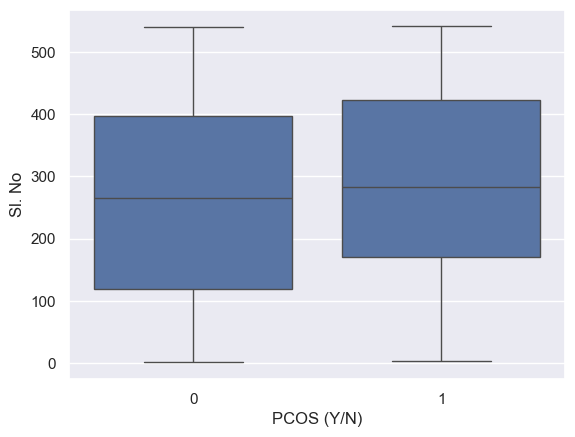

<Axes: xlabel='PCOS (Y/N)', ylabel='Patient File No.'>

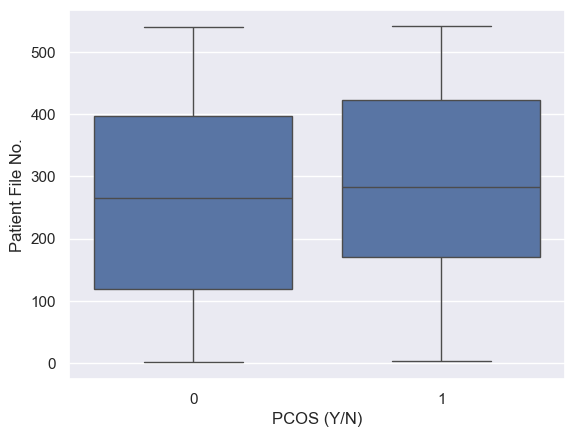

<Axes: xlabel='PCOS (Y/N)', ylabel='PCOS (Y/N)'>

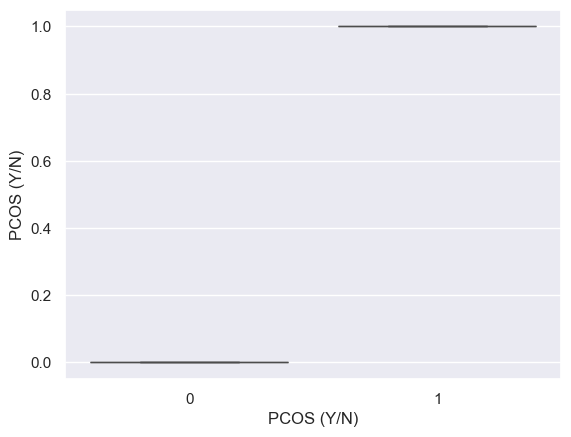

<Axes: xlabel='PCOS (Y/N)', ylabel='Age (yrs)'>

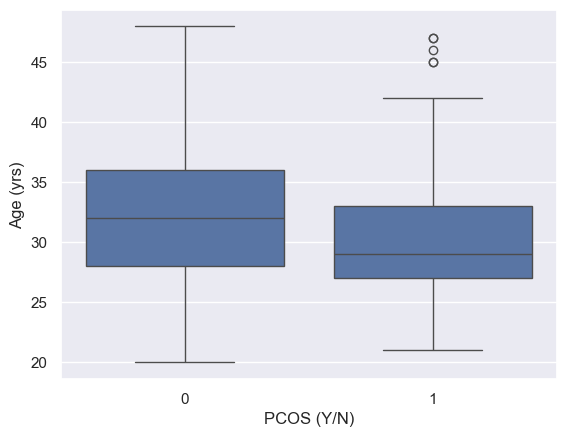

<Axes: xlabel='PCOS (Y/N)', ylabel='Weight (Kg)'>

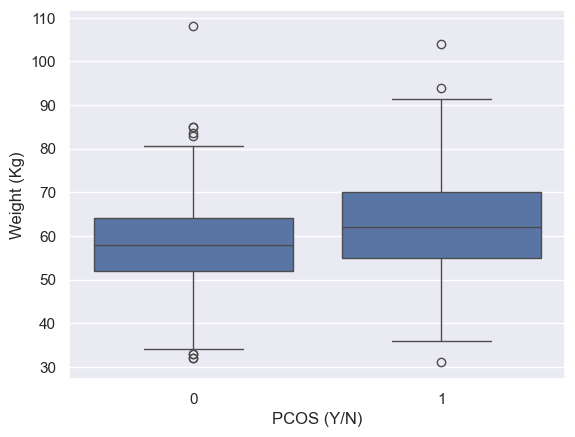

<Axes: xlabel='PCOS (Y/N)', ylabel='Height(Cm)'>

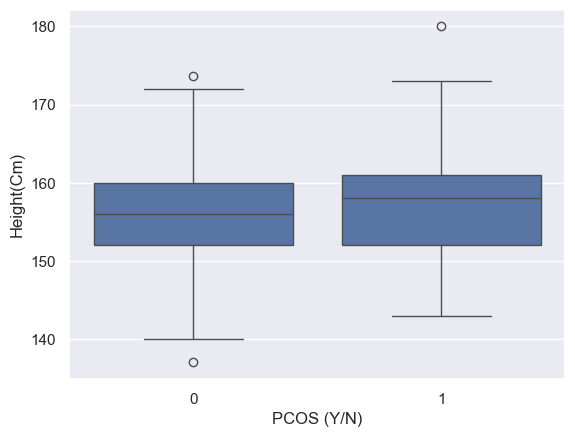

<Axes: xlabel='PCOS (Y/N)', ylabel='Blood Group'>

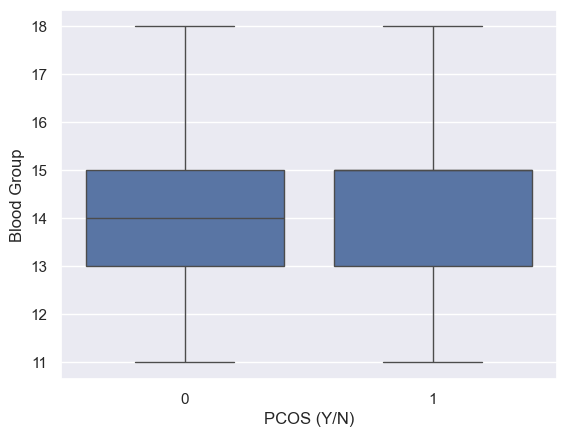

<Axes: xlabel='PCOS (Y/N)', ylabel='Pulse rate(bpm)'>

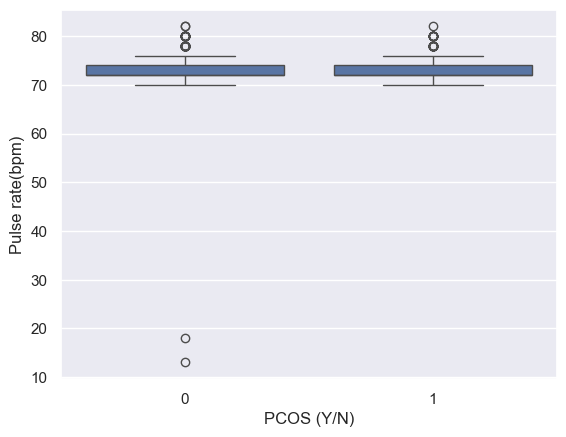

<Axes: xlabel='PCOS (Y/N)', ylabel='RR (breaths/min)'>

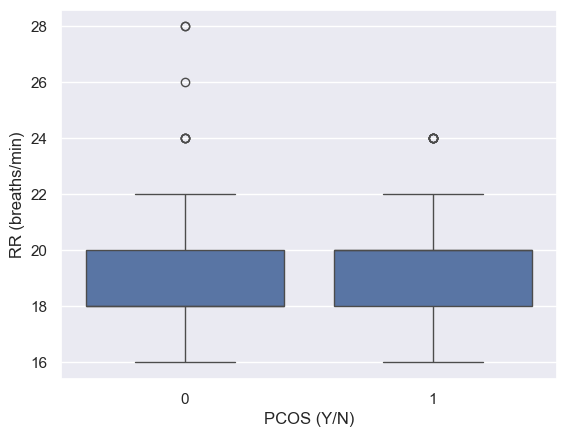

<Axes: xlabel='PCOS (Y/N)', ylabel='Hb(g/dl)'>

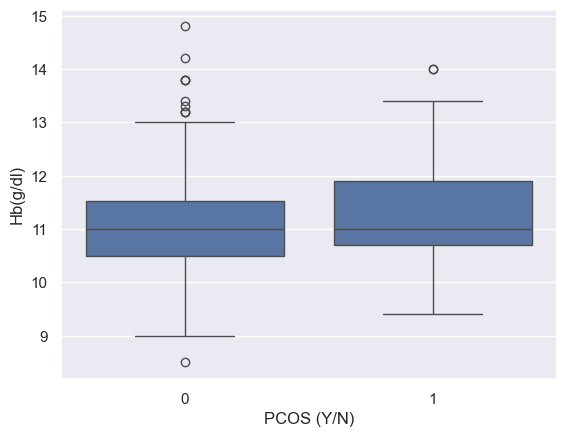

<Axes: xlabel='PCOS (Y/N)', ylabel='Cycle(R/I)'>

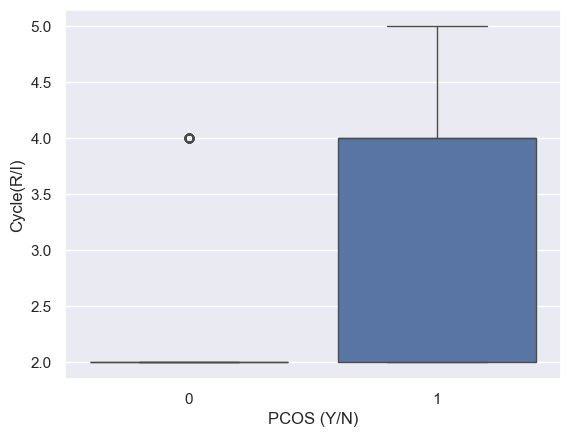

<Axes: xlabel='PCOS (Y/N)', ylabel='Cycle length(days)'>

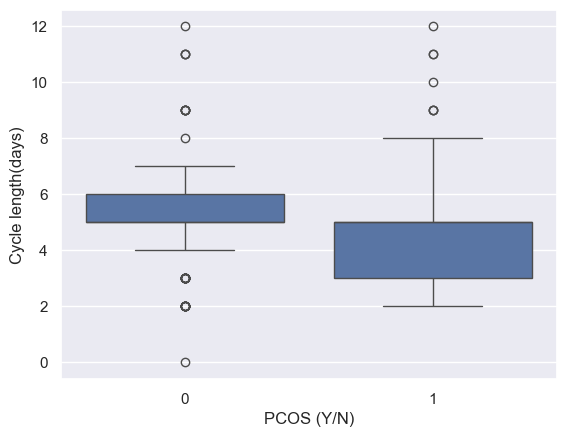

<Axes: xlabel='PCOS (Y/N)', ylabel='Marraige Status (Yrs)'>

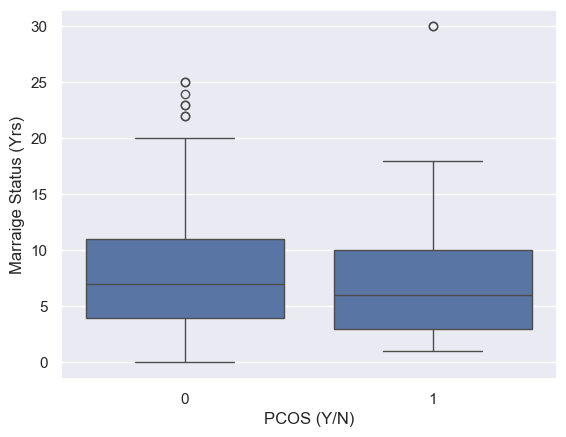

<Axes: xlabel='PCOS (Y/N)', ylabel='Pregnant(Y/N)'>

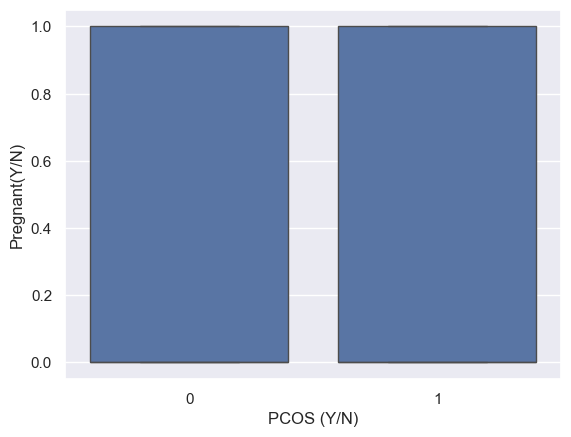

<Axes: xlabel='PCOS (Y/N)', ylabel='No. of aborptions'>

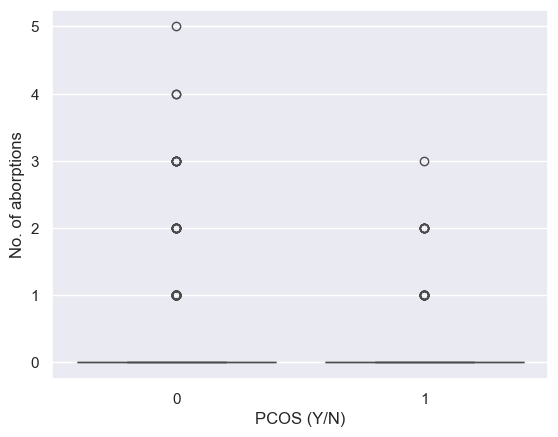

<Axes: xlabel='PCOS (Y/N)', ylabel='I   beta-HCG(mIU/mL)'>

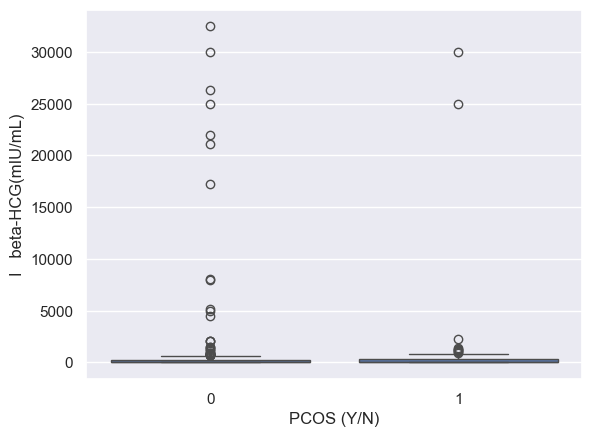

<Axes: xlabel='PCOS (Y/N)', ylabel='II    beta-HCG(mIU/mL)'>

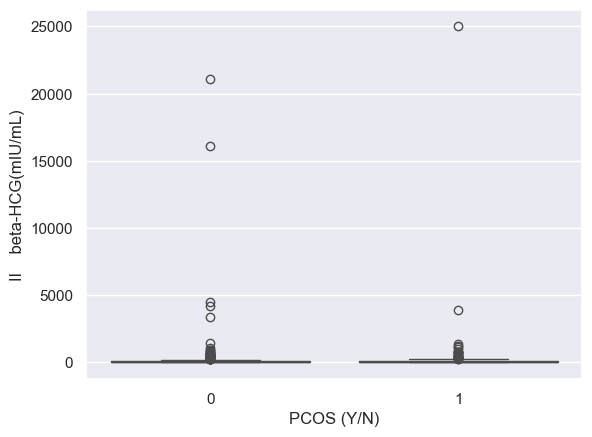

<Axes: xlabel='PCOS (Y/N)', ylabel='FSH(mIU/mL)'>

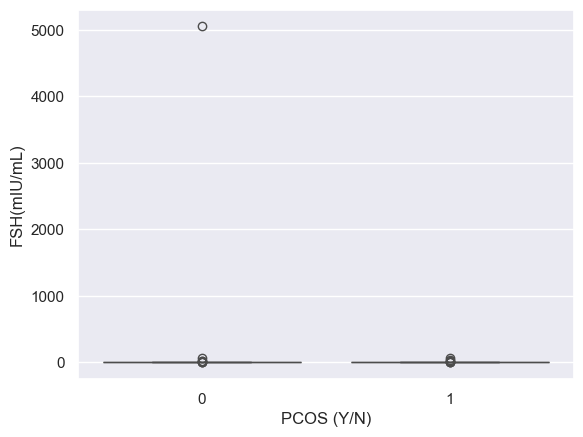

<Axes: xlabel='PCOS (Y/N)', ylabel='LH(mIU/mL)'>

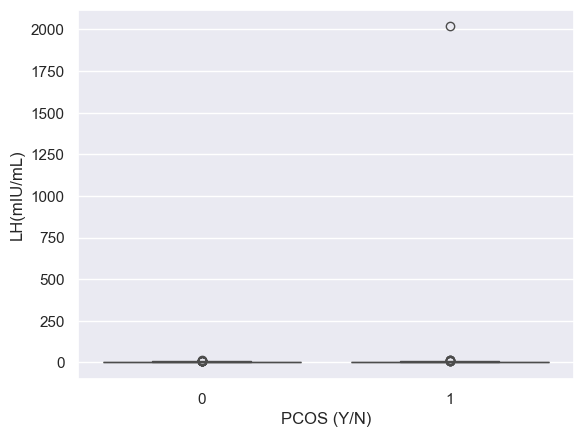

<Axes: xlabel='PCOS (Y/N)', ylabel='Hip(inch)'>

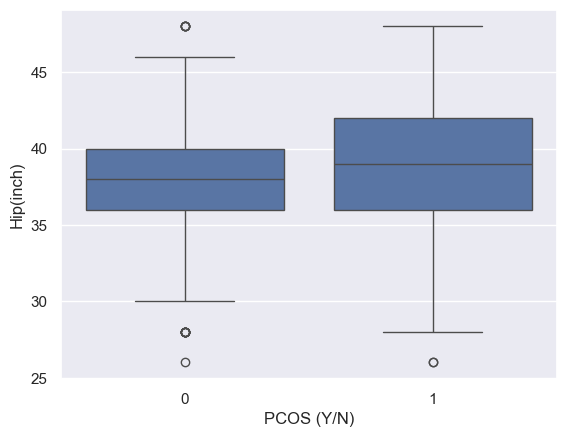

<Axes: xlabel='PCOS (Y/N)', ylabel='Waist(inch)'>

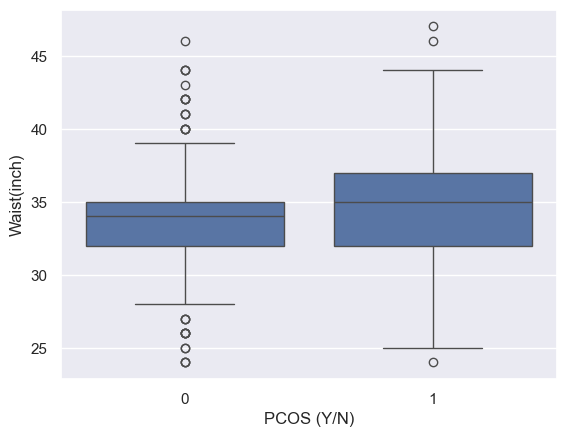

<Axes: xlabel='PCOS (Y/N)', ylabel='TSH (mIU/L)'>

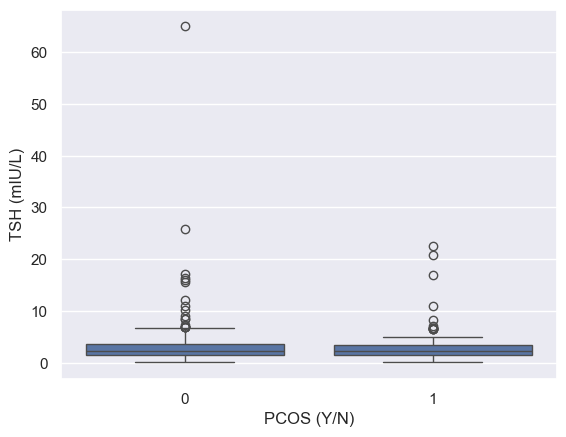

<Axes: xlabel='PCOS (Y/N)', ylabel='AMH(ng/mL)'>

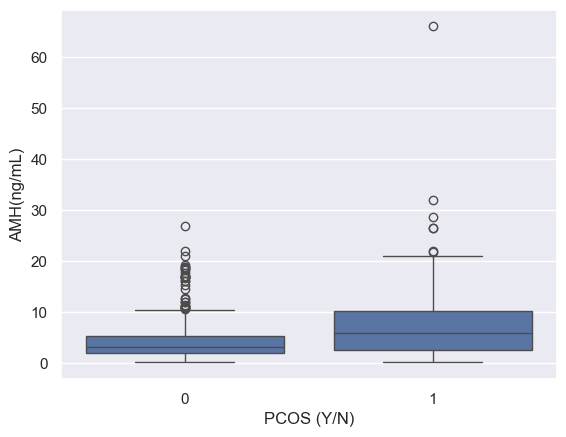

<Axes: xlabel='PCOS (Y/N)', ylabel='PRL(ng/mL)'>

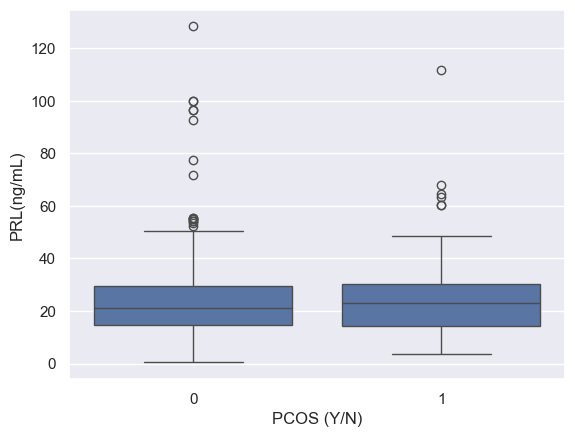

<Axes: xlabel='PCOS (Y/N)', ylabel='Vit D3 (ng/mL)'>

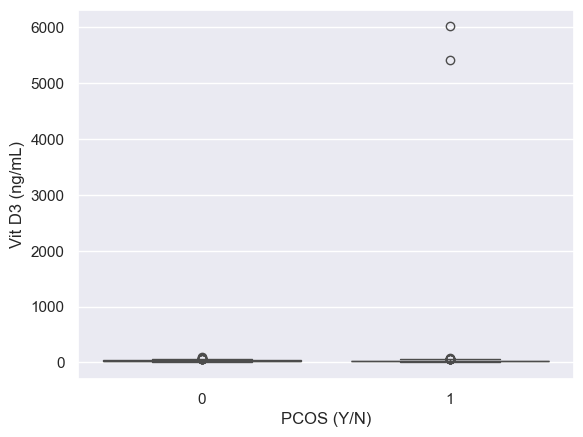

<Axes: xlabel='PCOS (Y/N)', ylabel='PRG(ng/mL)'>

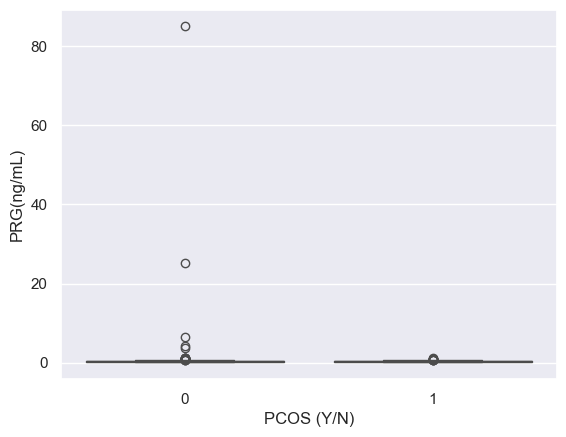

<Axes: xlabel='PCOS (Y/N)', ylabel='RBS(mg/dl)'>

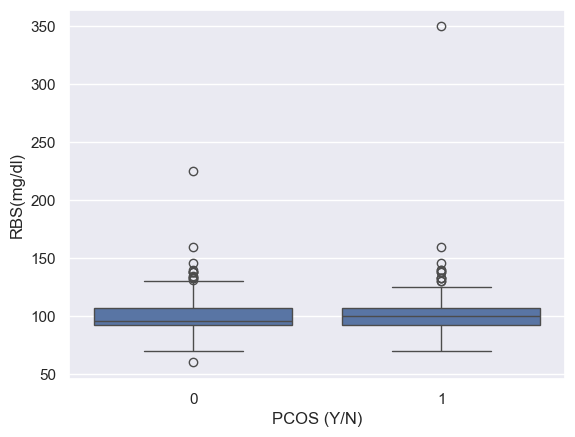

<Axes: xlabel='PCOS (Y/N)', ylabel='Weight gain(Y/N)'>

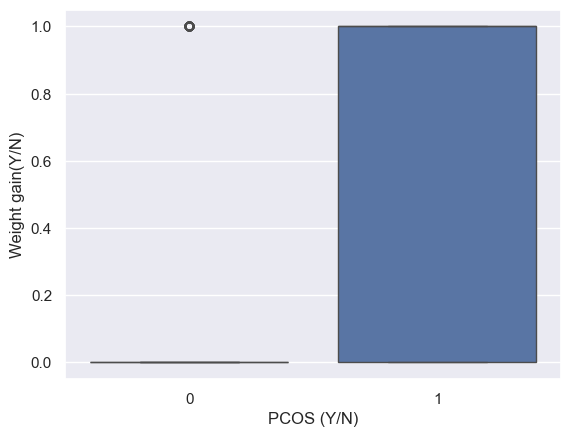

<Axes: xlabel='PCOS (Y/N)', ylabel='hair growth(Y/N)'>

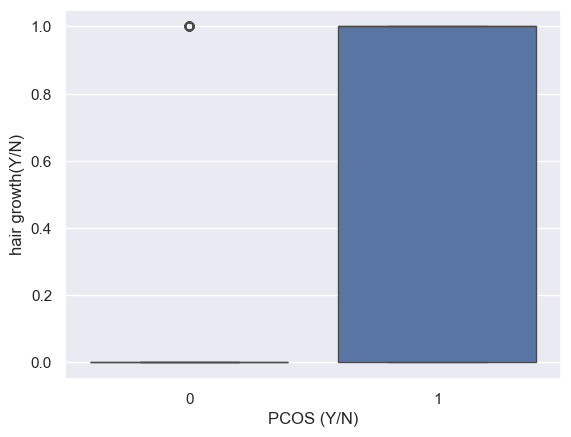

<Axes: xlabel='PCOS (Y/N)', ylabel='Skin darkening (Y/N)'>

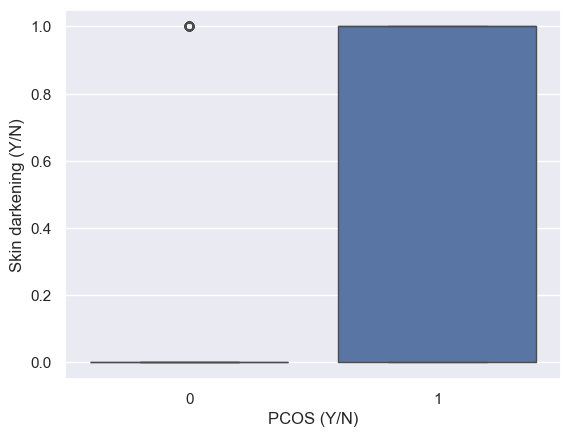

<Axes: xlabel='PCOS (Y/N)', ylabel='Hair loss(Y/N)'>

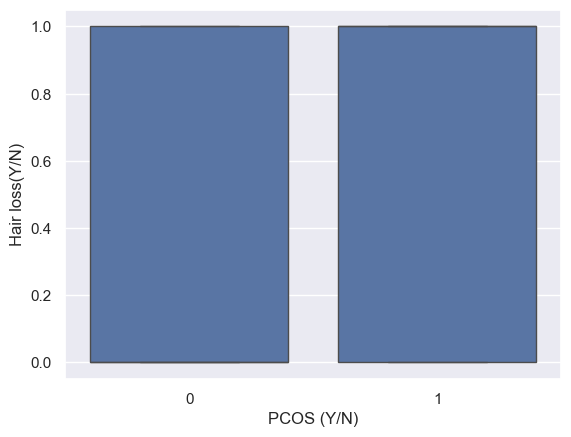

<Axes: xlabel='PCOS (Y/N)', ylabel='Pimples(Y/N)'>

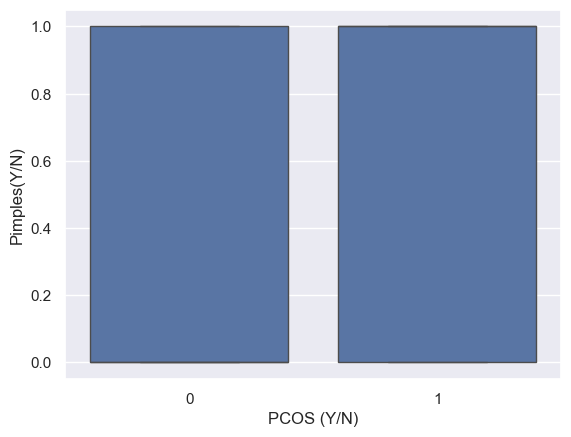

<Axes: xlabel='PCOS (Y/N)', ylabel='Fast food (Y/N)'>

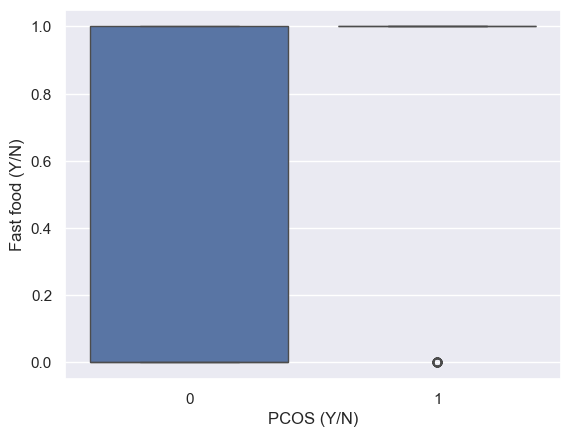

<Axes: xlabel='PCOS (Y/N)', ylabel='Reg.Exercise(Y/N)'>

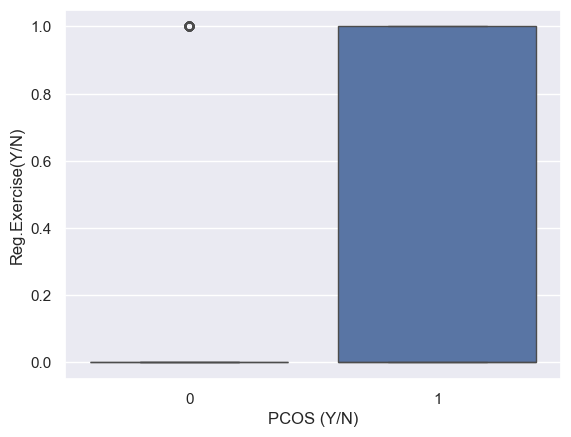

<Axes: xlabel='PCOS (Y/N)', ylabel='BP _Systolic (mmHg)'>

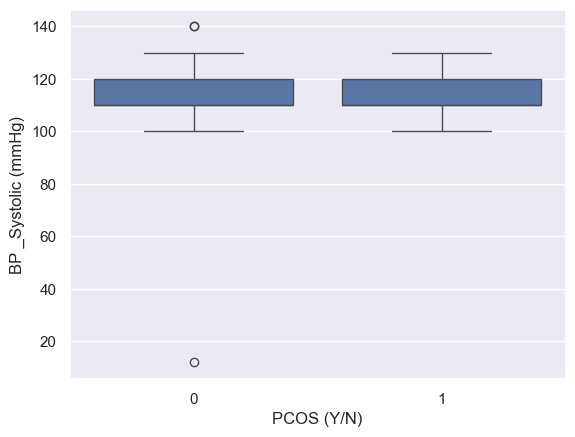

<Axes: xlabel='PCOS (Y/N)', ylabel='BP _Diastolic (mmHg)'>

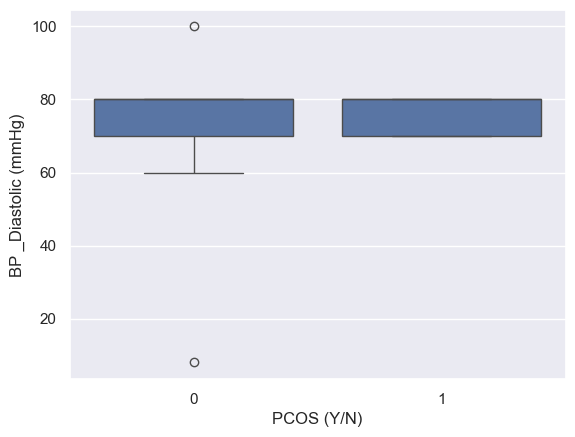

<Axes: xlabel='PCOS (Y/N)', ylabel='Follicle No. (L)'>

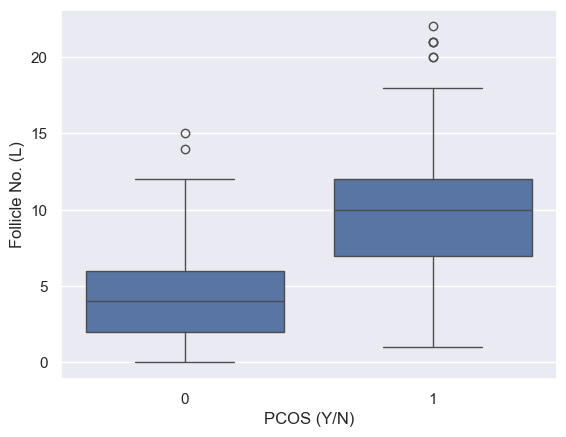

<Axes: xlabel='PCOS (Y/N)', ylabel='Follicle No. (R)'>

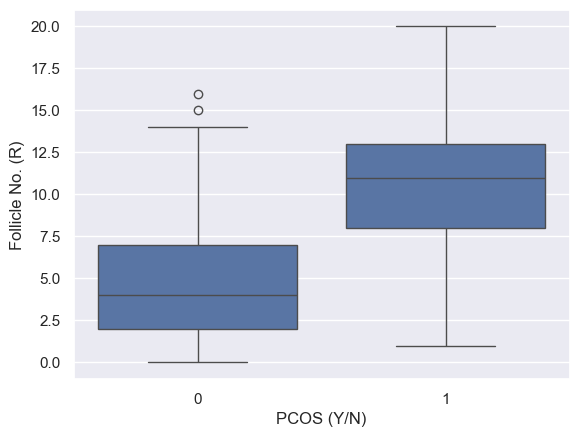

<Axes: xlabel='PCOS (Y/N)', ylabel='Avg. F size (L) (mm)'>

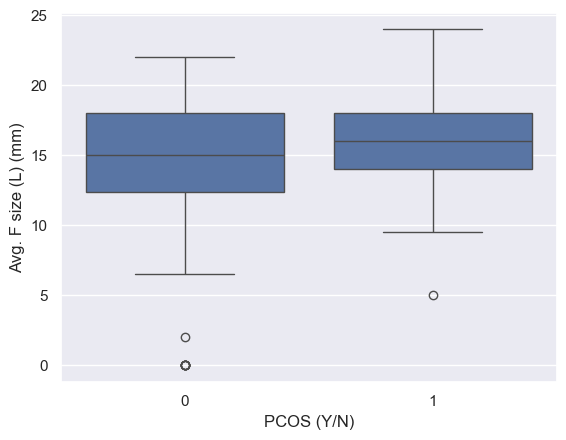

<Axes: xlabel='PCOS (Y/N)', ylabel='Avg. F size (R) (mm)'>

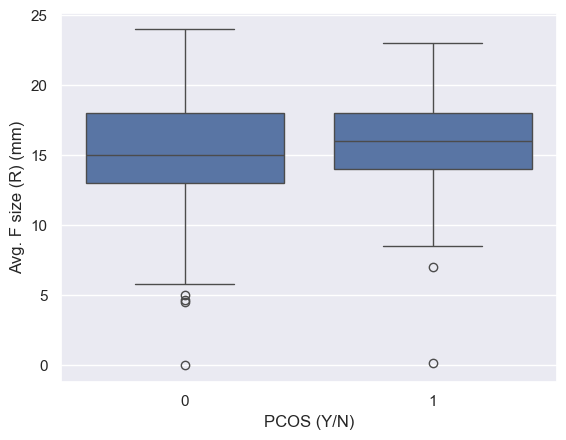

<Axes: xlabel='PCOS (Y/N)', ylabel='Endometrium (mm)'>

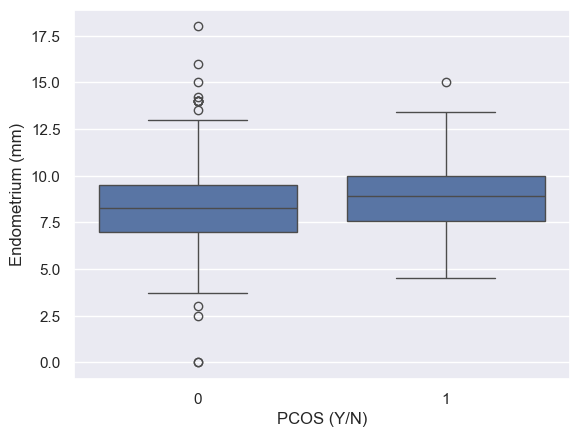

In [38]:
# Box plots of all the features
for y in data.columns:
    sns.boxplot(y=y, x="PCOS (Y/N)", data=data)
    plt.show()

<Figure size 4500x1500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Features')

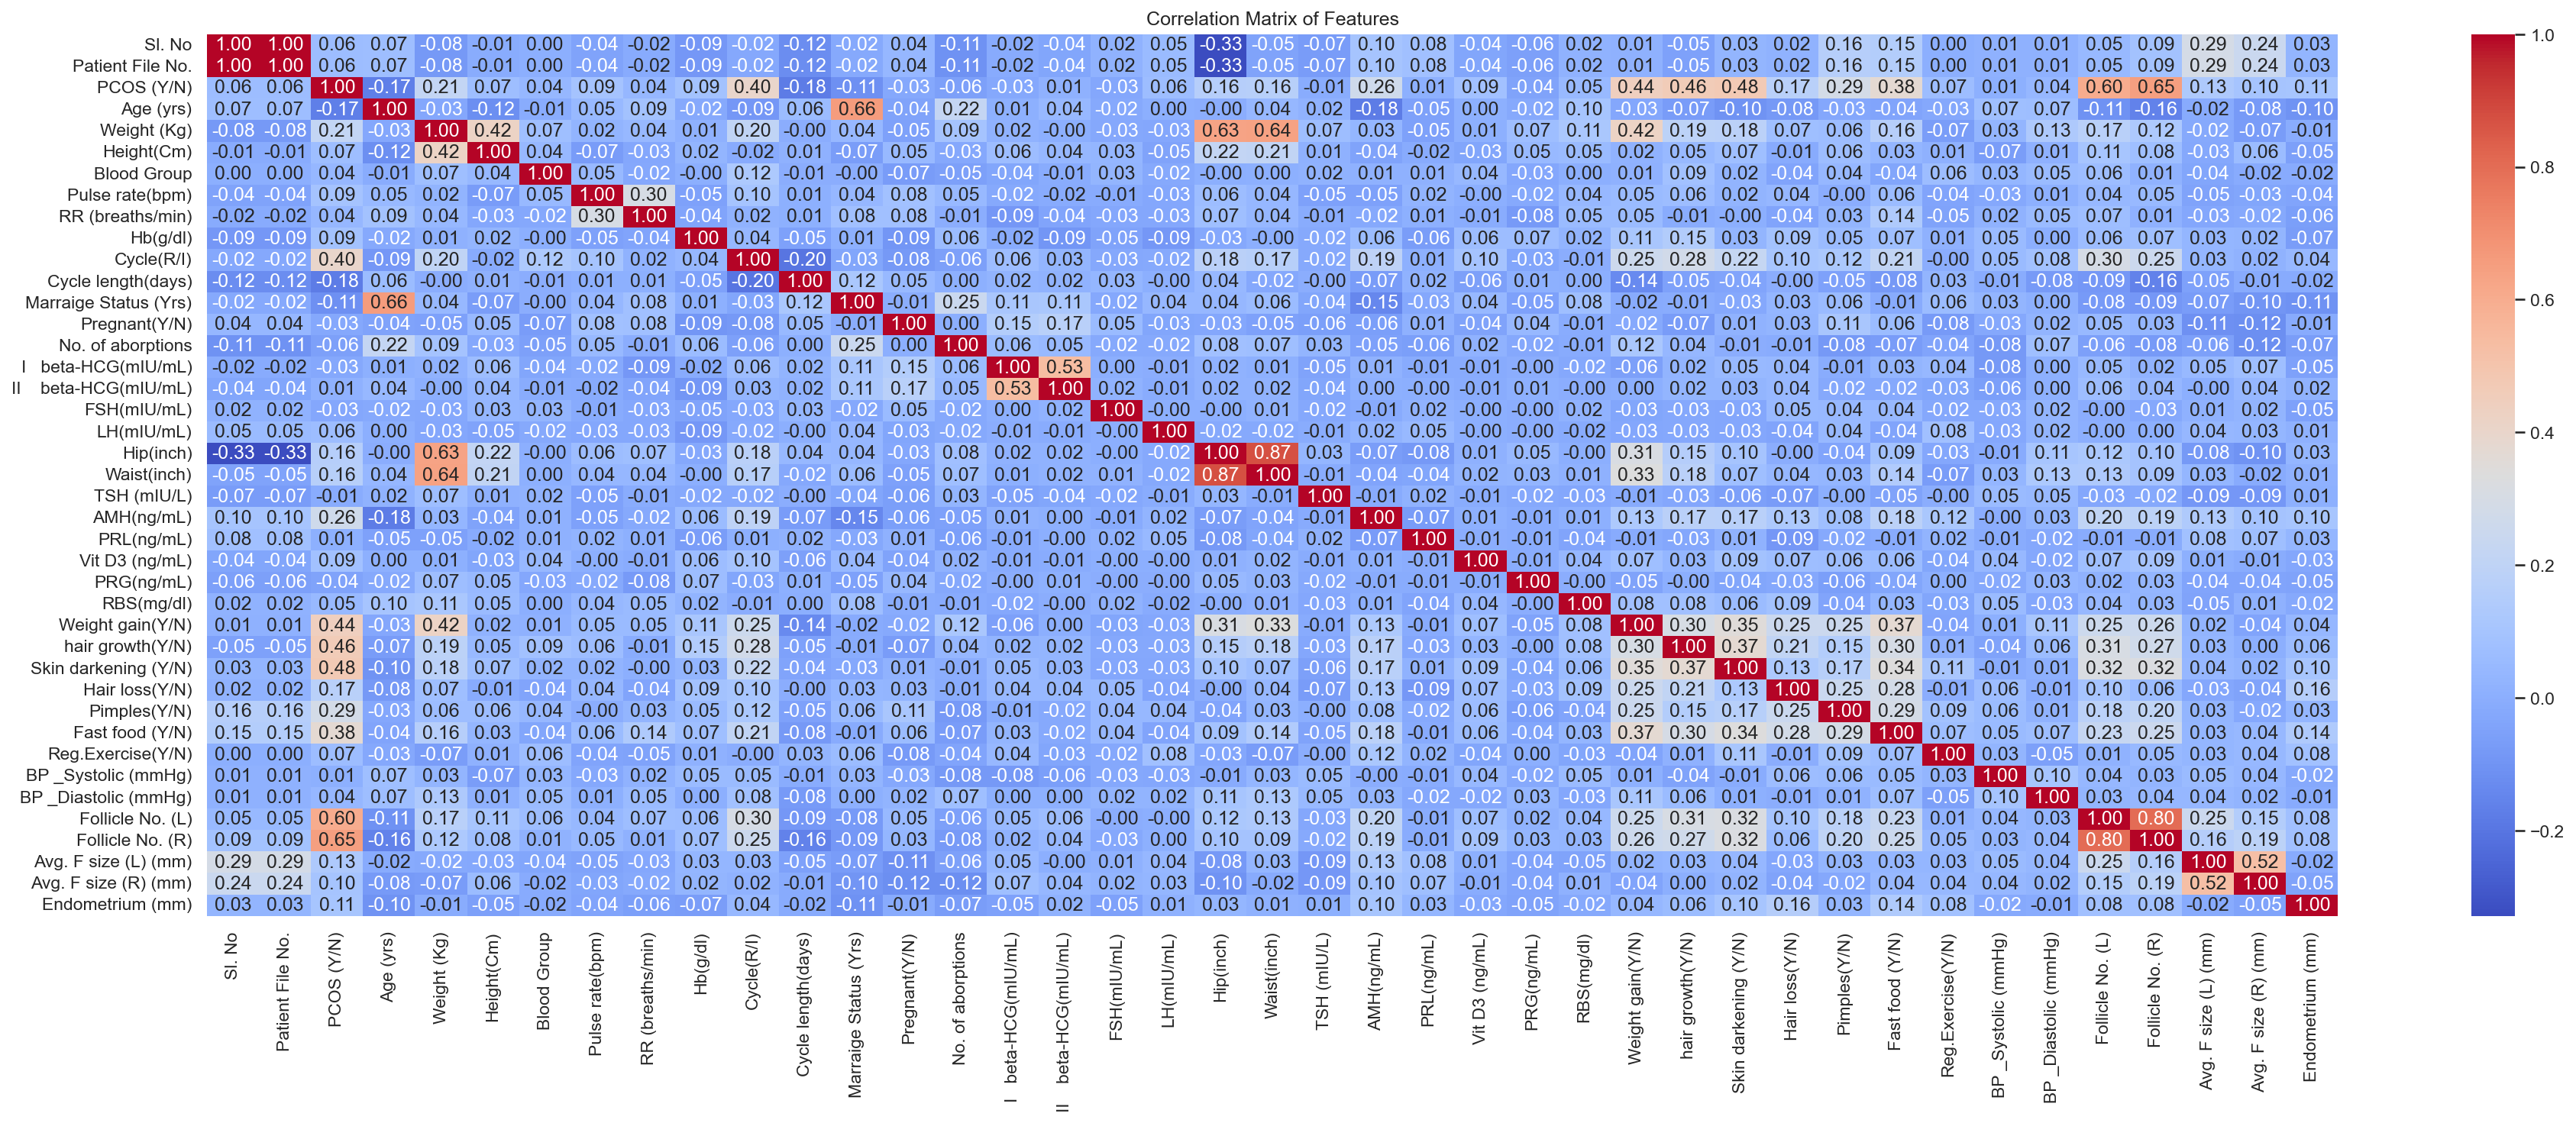

In [40]:
# Correlation Matrix of all the features
correlation_matrix = data.corr()

# Create a larger figure with higher resolution
plt.figure(figsize=(30, 10), dpi=150)

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title and display the plot
plt.title('Correlation Matrix of Features')
plt.show()

In [35]:
# Correlation Matrix of only the selected features

For Visualization Plots
* PCOS

* Weight
* Age
* Cycle(R/I)
*  I   beta-HCG(mIU/mL)      
* II    beta-HCG(mIU/mL)      
* FSH(mIU/mL)                 
* LH(mIU/mL)
* Follicle No. (L)            
* Follicle No. (R)            
* Avg. F size (L) (mm)        
* Avg. F size (R) (mm)       
* Endometrium (mm)

<Figure size 1400x1000 with 0 Axes>

<Axes: xlabel='Age (yrs)', ylabel='Weight (Kg)'>

Text(0.5, 1.0, 'Scatter plot of Age vs. Weight with PCOS status')

Text(0.5, 0, 'Age (years)')

Text(0, 0.5, 'Weight (Kg)')

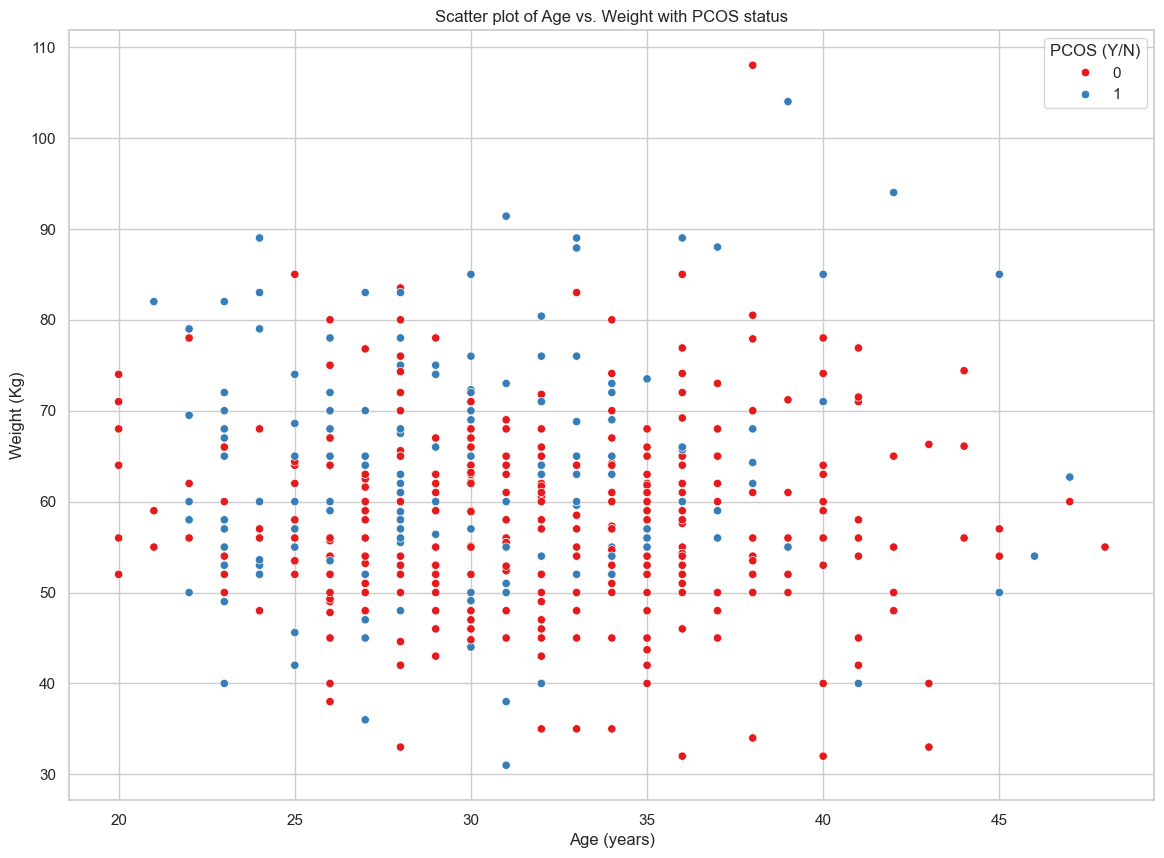

In [42]:
# Set up the size and style of the plots
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

# Example: Scatter plot of Age vs. Weight with hue by PCOS status
sns.scatterplot(data=data, x='Age (yrs)', y='Weight (Kg)', hue='PCOS (Y/N)', palette='Set1')

# Add title and labels
plt.title('Scatter plot of Age vs. Weight with PCOS status')
plt.xlabel('Age (years)')
plt.ylabel('Weight (Kg)')

# Display the plot
plt.show()